<a href="https://colab.research.google.com/github/akhilnazim0/Data-Science-Project/blob/main/Data_Science_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
#import common modules for data analysis
# Import common modules for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy.stats import gaussian_kde, kurtosis, skew

In [94]:
#read data as dataframe
df = pd.read_csv('/content/drive/MyDrive/Data science project/diabetes_012_health_indicators_BRFSS2015.csv')

 diabetes _ 012 _ health _ indicators _ BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables


*   **Diabetes**_012 is 0 = no diabetes 1 = prediabetes 2 = diabetes
*   **HighBP** is 0 = no high BP 1 = high BP
*  **HighChol** is 0 = no high cholesterol 1 = high cholesterol
*  **CholCHeck** is 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
*   **Smoker** is Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
*   **Stroke** is (Ever told) you had a stroke. 0 = no 1 = yes
*   **HeartDiseaseorAttack** is coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
*   **PhysActivity** is physical activity in past 30 days - not including job 0 = no 1 = yes
*   **Fruits** is Consume Fruit 1 or more times per day 0 = no 1 = yes
*   **Age** is 13-level age category (_AGEG5YR see codebook) 1 = 18-24 , 9 = 60-64 , 13 = 80 or older


In [95]:
#what does dataframe look like?
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [96]:
#To see the dimensions
df.shape


(253680, 22)

In [97]:
#What are the datatype of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [98]:
#Basic Descriptive
pd.set_option('display.float_format', lambda x: '% 3.f' % x)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680,0,1,0,0,0,0,2
HighBP,253680,0,0,0,0,0,1,1
HighChol,253680,0,0,0,0,0,1,1
CholCheck,253680,1,0,0,1,1,1,1
BMI,253680,28,7,12,24,27,31,98
Smoker,253680,0,0,0,0,0,1,1
Stroke,253680,0,0,0,0,0,0,1
HeartDiseaseorAttack,253680,0,0,0,0,0,0,1
PhysActivity,253680,1,0,0,1,1,1,1
Fruits,253680,1,0,0,0,1,1,1


In [99]:
#To find any missing values in dataframe
print(f'The null values in the dataset are\n{df.isna().sum()}')

The null values in the dataset are
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


**2. FILTERING**

In [100]:
#Delete/Remove unwanted columns or not usefull to the model
df_f = df.drop(['Income','Education','Veggies','Fruits'],axis=1, )
df_f.shape

(253680, 18)

In [101]:
#finding missing value
df_f.isnull()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
253676,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
253677,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
253678,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [102]:
#To find which column is missing value or what is the extent of missingness
df_f.isnull().sum()*100/len(df_f)

Diabetes_012             0
HighBP                   0
HighChol                 0
CholCheck                0
BMI                      0
Smoker                   0
Stroke                   0
HeartDiseaseorAttack     0
PhysActivity             0
HvyAlcoholConsump        0
AnyHealthcare            0
NoDocbcCost              0
GenHlth                  0
MentHlth                 0
PhysHlth                 0
DiffWalk                 0
Sex                      0
Age                      0
dtype: float64

This means there is no missing value in the columns

In [103]:
#how to check for row Duplication
df_f.duplicated().sum()

80930

In [104]:
#To see the Duplicate rows
df_f.loc[df_f.duplicated(), :]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
913,0,1,1,1,23,0,0,0,1,0,1,0,3,0,0,0,0,13
1057,0,0,0,1,26,0,0,0,1,0,1,0,2,0,0,0,1,10
1061,0,0,1,1,25,1,0,0,1,0,1,0,2,0,0,0,0,11
1200,0,1,0,1,29,0,0,0,1,0,1,0,2,0,0,0,0,9
1242,2,1,1,1,27,1,0,0,0,0,1,0,5,0,30,1,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253662,0,0,0,1,16,0,0,0,1,0,1,0,1,0,0,0,0,5
253667,0,1,1,1,28,1,0,0,0,0,1,0,3,0,0,0,0,11
253672,0,1,0,1,30,1,0,1,1,0,1,0,3,0,0,0,1,12
253674,0,0,0,1,27,0,0,0,0,0,1,0,1,0,0,0,0,3


In [105]:
#locating duplicate rows
df_f.loc[df_f.duplicated(keep='last'), :]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
3,0,1,0,1,27,0,0,0,1,0,1,0,2,0,0,0,0,11
5,0,1,1,1,25,1,0,0,1,0,1,0,2,0,2,0,1,10
7,0,1,1,1,25,1,0,0,1,0,1,0,3,0,0,1,0,11
9,0,0,0,1,24,0,0,0,0,0,1,0,2,0,0,0,1,8
10,2,0,0,1,25,1,0,0,1,0,1,0,3,0,0,0,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252946,0,0,0,1,25,0,0,0,1,0,1,0,3,0,0,0,0,2
252980,0,0,0,1,26,0,0,0,1,0,1,0,3,0,0,0,1,6
253034,0,1,0,1,26,0,0,0,0,0,1,0,3,0,0,0,1,10
253138,0,0,0,1,17,0,0,0,1,0,1,0,1,0,7,0,0,1


In [106]:
#Remove Duplicate rows
df_f.drop_duplicates(keep='last').shape

(172750, 18)

In [107]:
df_f['Age'].unique()

array([ 9.,  7., 11., 10.,  8., 13.,  4.,  6.,  2., 12.,  5.,  1.,  3.])

In [108]:
# Define the mapping dictionary for age categories
age_category_map = {
    1: 'Young adults',
    2: 'Young adults',
    3: 'Adults',
    5: 'Adults',
    6: 'Adults',
    7: 'Middle-aged',
    8: 'Middle-aged',
    9: 'Middle-aged',
    10: 'Old',
    11: 'Old',
    12: 'Old',
    13: 'Old'
}

#the age codes to age categories
df_f['Age_Category'] = df_f['Age'].map(age_category_map)

# Display the updated DataFrame
print(df_f)

        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                  0       1         1          1   40       1       0   
1                  0       0         0          0   25       1       0   
2                  0       1         1          1   28       0       0   
3                  0       1         0          1   27       0       0   
4                  0       1         1          1   24       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253675             0       1         1          1   45       0       0   
253676             2       1         1          1   18       0       0   
253677             0       0         0          1   28       0       0   
253678             0       1         0          1   23       0       0   
253679             2       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  HvyAlcoholConsump  AnyHealthcare  \
0                          0   

<Axes: xlabel='Age_Category'>

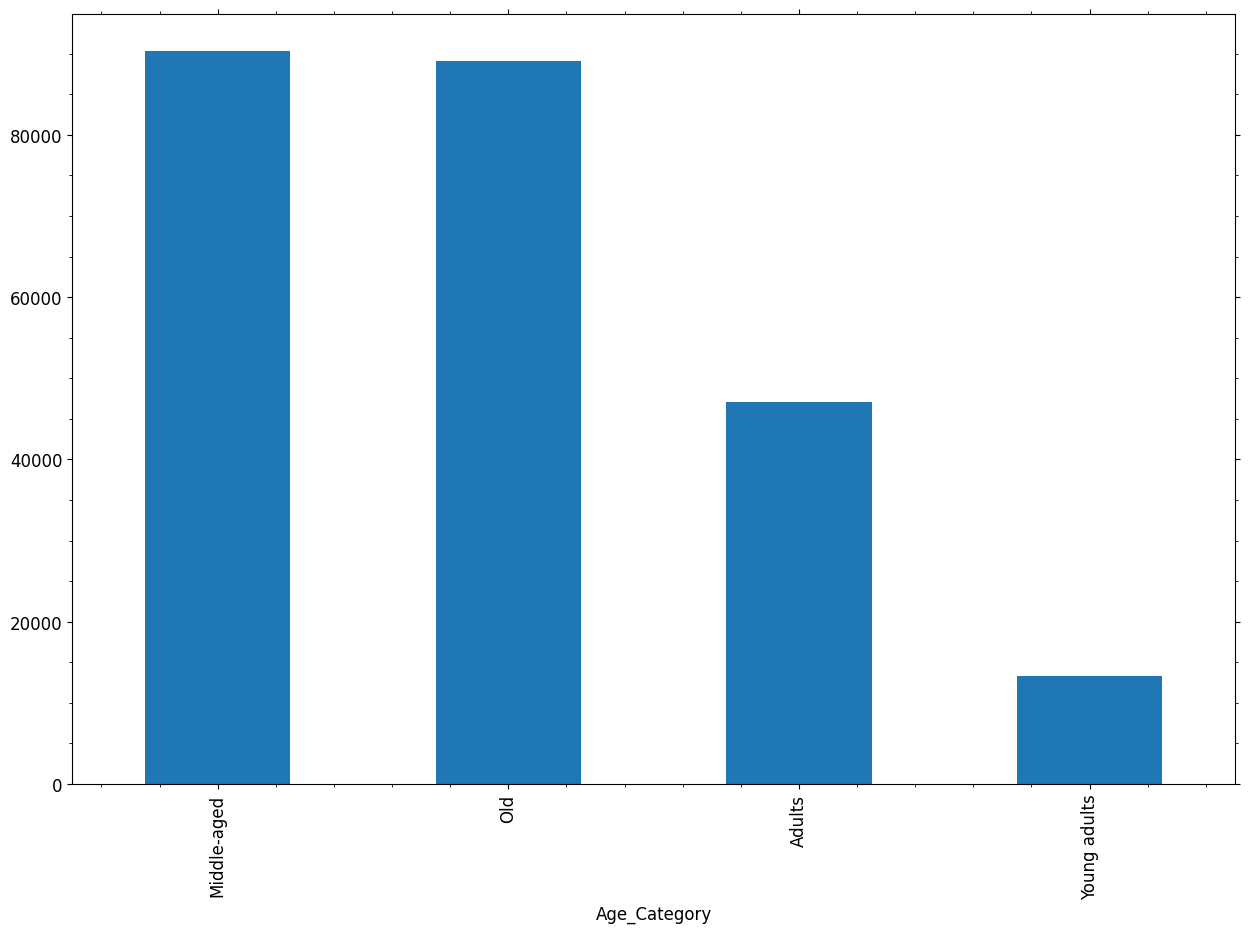

In [109]:
df_f['Age_Category'].value_counts().plot(kind='bar')

# **Pricipal Data Analysis**

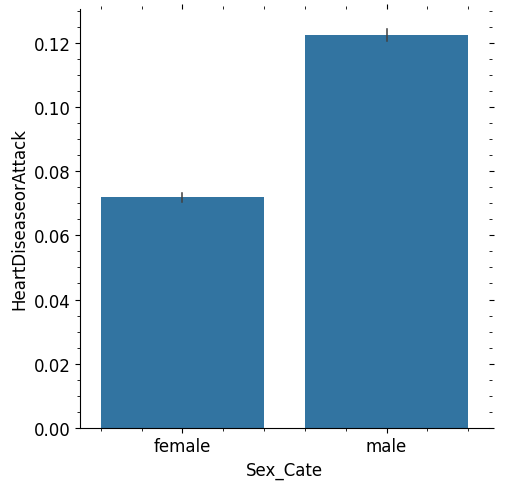

In [110]:
#creating Sex category
df_f['Sex_Cate'] = df_f['Sex'].replace([0.0,1.0],['female','male'])
df_f.groupby('Sex_Cate')['HeartDiseaseorAttack'].mean()
sns.catplot(data=df_f, y='HeartDiseaseorAttack', x='Sex_Cate', kind='bar')
plt.show()


In [111]:
'''
# Convert 'Sex_Cate' to numeric
df_f_encoded = pd.get_dummies(df_f, columns=['Age_Category','Sex_Cate'], drop_first=True)

# Re-separate features and target variable after encoding
X = df_f_encoded.drop('HeartDiseaseorAttack', axis=1)
y = df_f_encoded['HeartDiseaseorAttack']

# Verify all columns in X are numeric
print(X.dtypes)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the first few rows and data types to confirm encoding
print(X.head())
print(X.dtypes)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
'''

"\n# Convert 'Sex_Cate' to numeric\ndf_f_encoded = pd.get_dummies(df_f, columns=['Age_Category','Sex_Cate'], drop_first=True)\n\n# Re-separate features and target variable after encoding\nX = df_f_encoded.drop('HeartDiseaseorAttack', axis=1)\ny = df_f_encoded['HeartDiseaseorAttack']\n\n# Verify all columns in X are numeric\nprint(X.dtypes)\n\n# Standardize the features\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Check the first few rows and data types to confirm encoding\nprint(X.head())\nprint(X.dtypes)\n\n# Standardize the features\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n"

In [112]:
# Initialize PCA
pca = PCA(n_components=11)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['HighBP', 'HighChol','HeartDiseaseorAttack','CholCheck','BMI','Diabetes_012','Smoker','Stroke','Sex','PhysHlth','HvyAlcoholConsump'])
df_pca['HeartDiseaseorAttack'] = y.reset_index(drop=True)


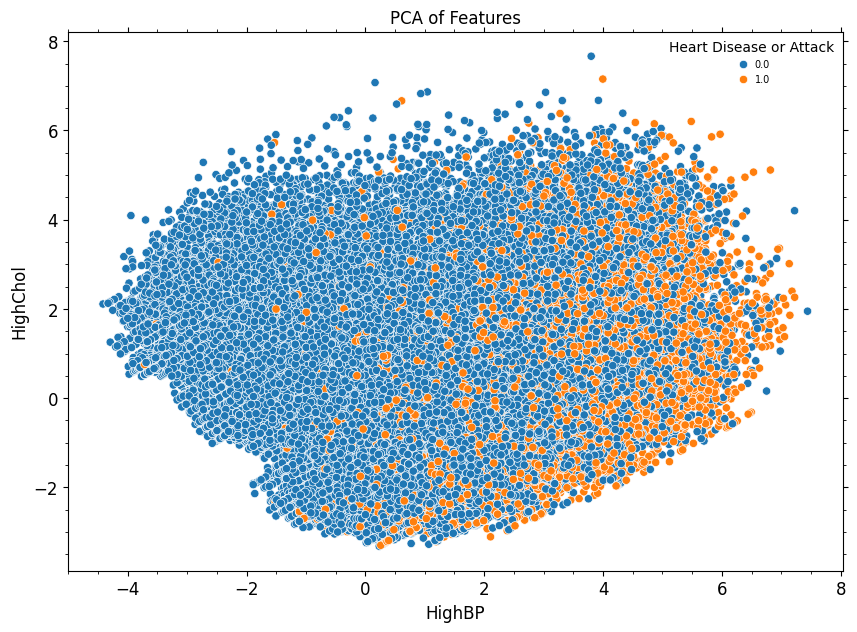

In [113]:
# Scatter plot of PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x='HighBP', y='HighChol', hue='HeartDiseaseorAttack', data=df_pca,)
plt.title('PCA of Features')
plt.xlabel('HighBP')
plt.ylabel('HighChol')
plt.legend(title='Heart Disease or Attack')
plt.show()


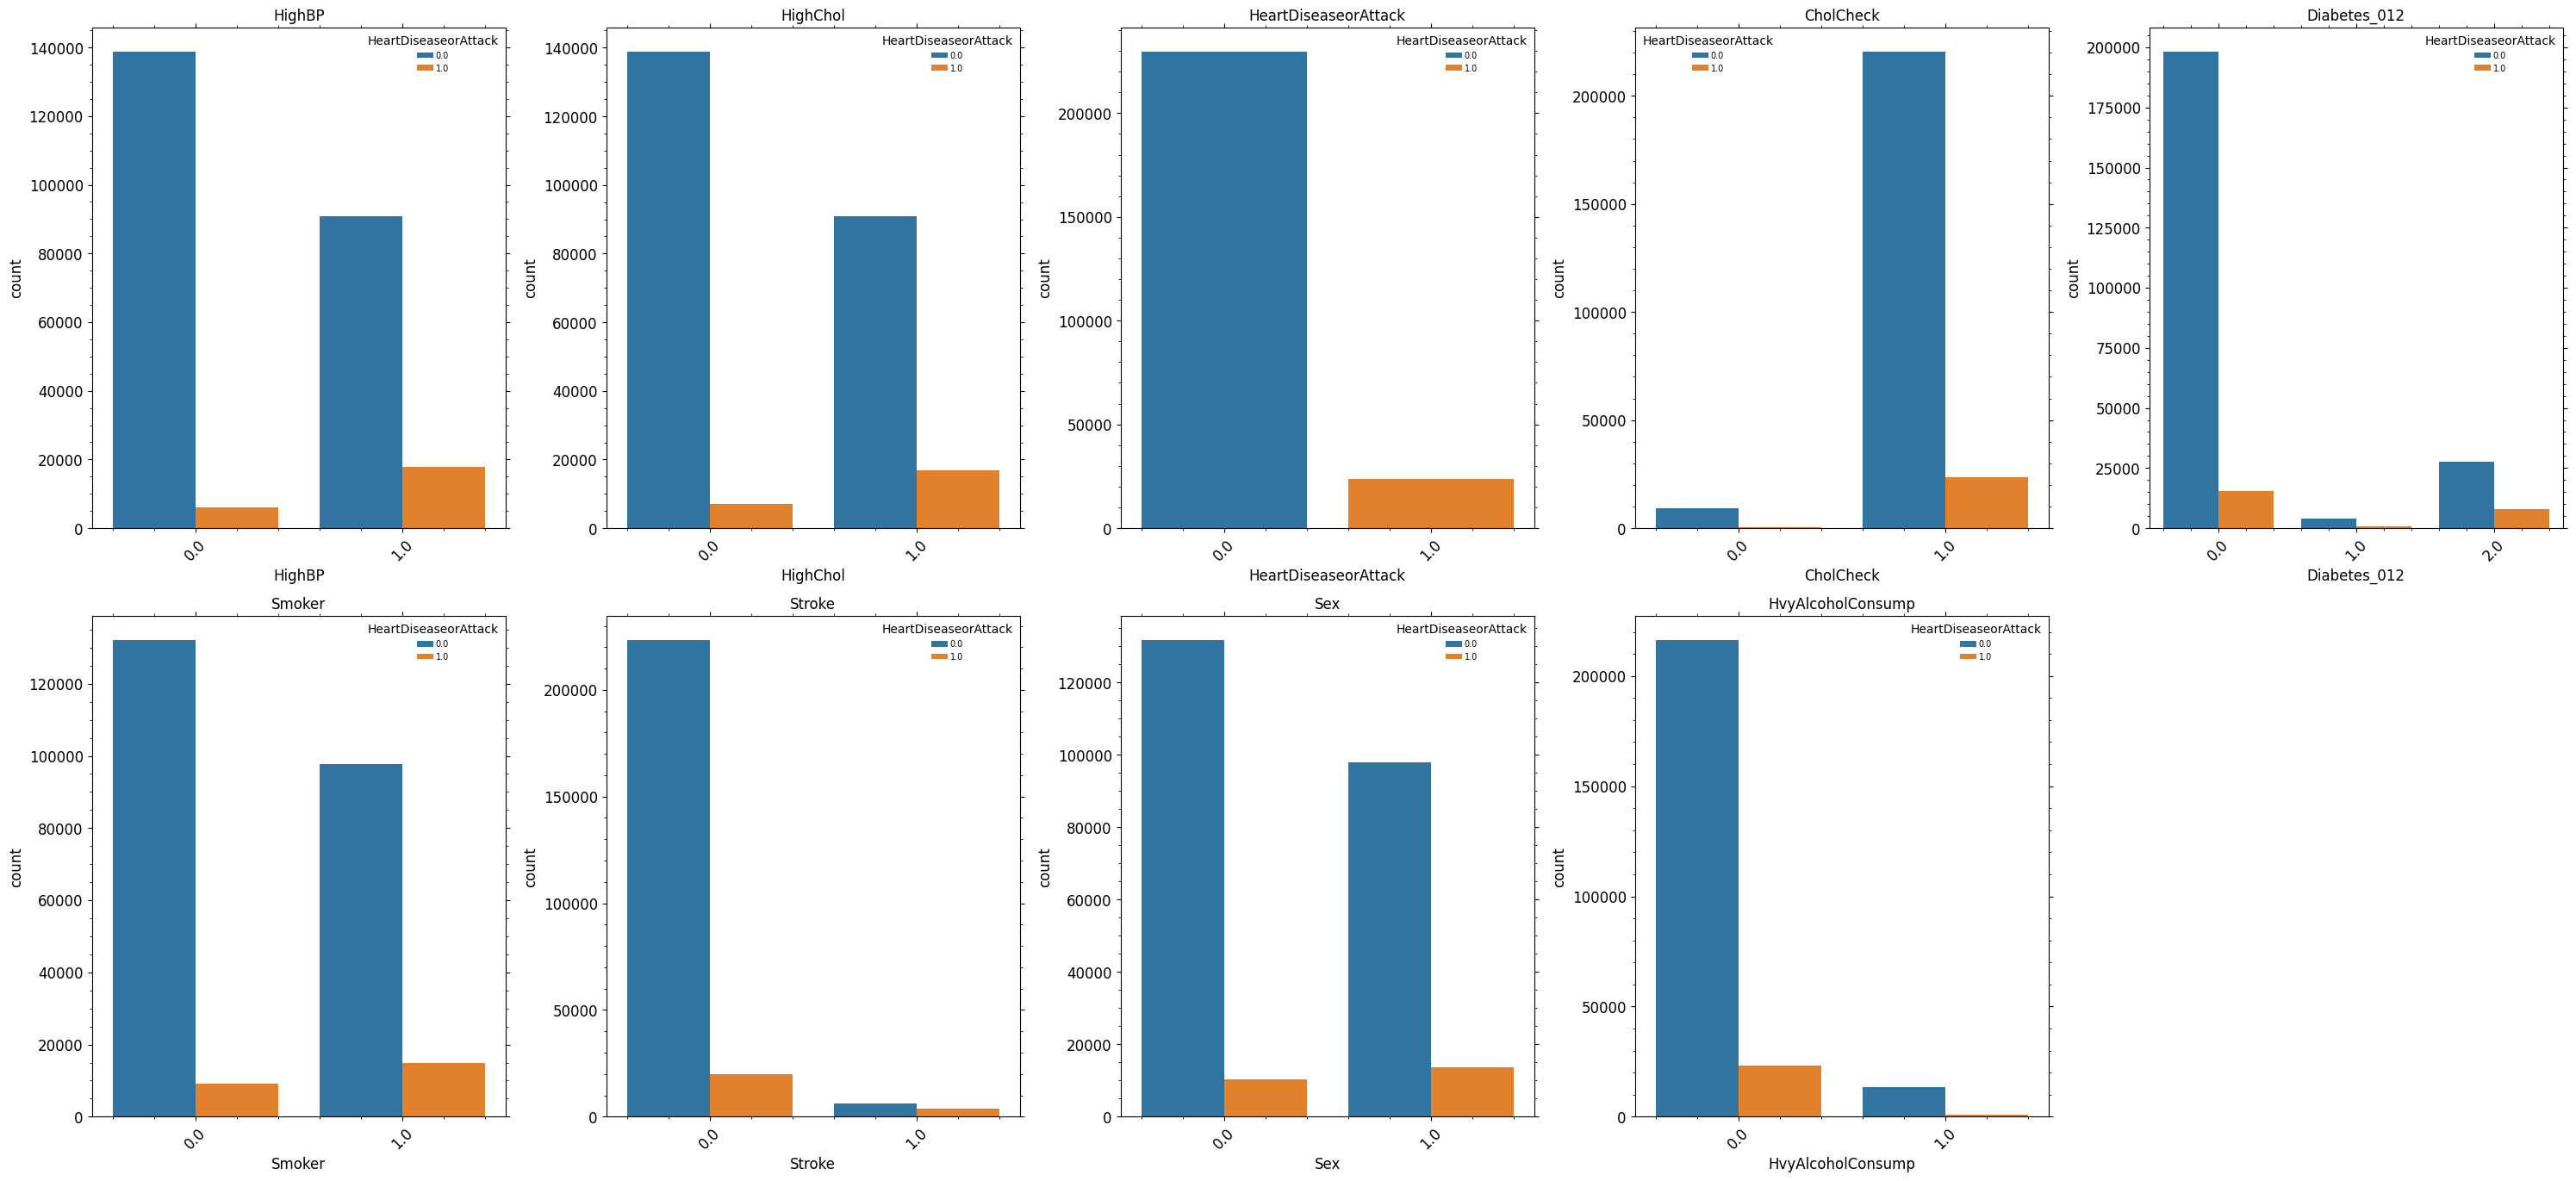

In [114]:
# Specify the columns you want to plot
columns_to_plot = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'CholCheck',
                    'Diabetes_012', 'Smoker', 'Stroke', 'Sex',  'HvyAlcoholConsump']

# Create a subset of the DataFrame with the selected columns
df_subset = df_f[columns_to_plot]

# Create the figure and axes
plt.figure(figsize=(30, 20))  # Adjust figure size as needed

# Loop through the columns and create a subplot for each
for i, column in enumerate(columns_to_plot):
    plt.subplot(3, 5, i + 1)
    sns.countplot(x=column, hue="HeartDiseaseorAttack", data=df_f)
    plt.title(column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

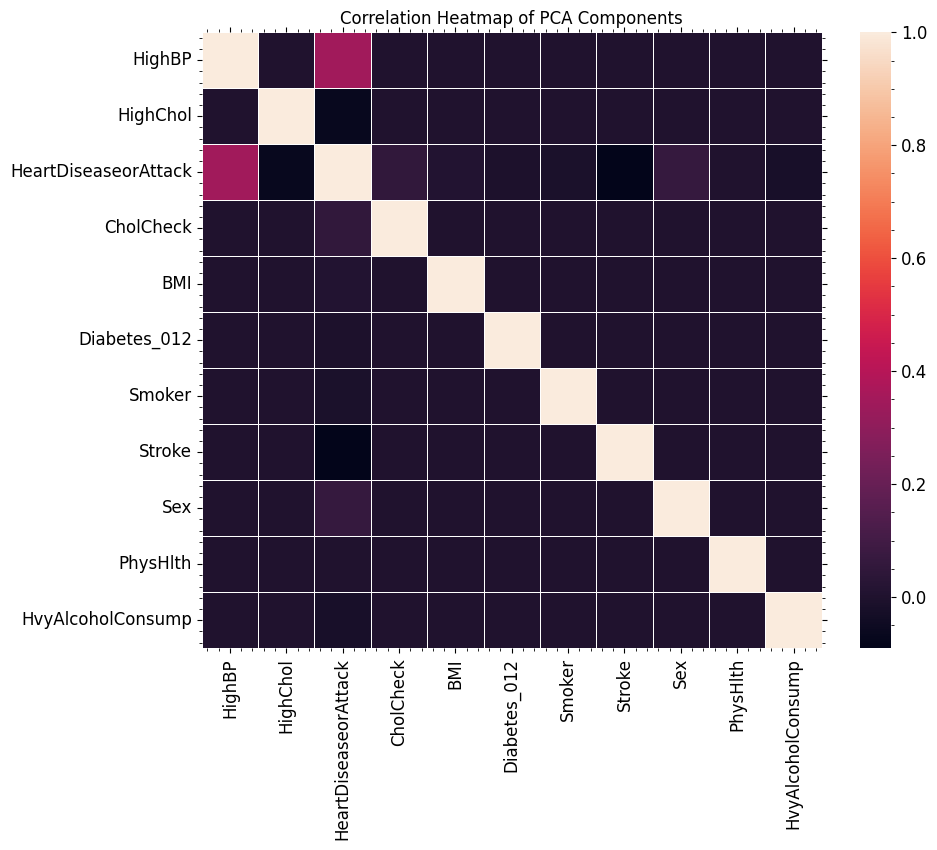

In [115]:
# Calculate the correlation matrix
corr_matrix_pca = df_pca.corr()

# Plot the heatmap
dpi = 200 # 200-300 as per guidelines
# maxpix = 670  # max pixels of plot
maxpix = 3200  # max pixels of plot
width = maxpix / dpi  # max allowed with
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pca, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of PCA Components')
plt.show()

In [116]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca.drop('HeartDiseaseorAttack', axis=1), df_pca['HeartDiseaseorAttack'], test_size=0.3, random_state=10)


In [117]:
# Apply SMOTE to handle class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# **Generating Machine Learning Models**

In [118]:

# Model 1
model_1 = LogisticRegression()
model_1.fit(X_resampled, y_resampled)
y_pred = model_1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.73      0.84     68824
         1.0       0.24      0.79      0.37      7280

    accuracy                           0.74     76104
   macro avg       0.60      0.76      0.60     76104
weighted avg       0.90      0.74      0.79     76104

[[50475 18349]
 [ 1538  5742]]


In [119]:
# Model 2
model_2 = RandomForestClassifier()
model_2.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91     68824
         1.0       0.28      0.45      0.35      7280

    accuracy                           0.84     76104
   macro avg       0.61      0.66      0.63     76104
weighted avg       0.88      0.84      0.85     76104

[[60644  8180]
 [ 4024  3256]]


In [120]:
# Model 3
model_3= KNeighborsClassifier()
model_3.fit(X_resampled, y_resampled)
y_pred = model_3.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     68824
         1.0       0.23      0.55      0.33      7280

    accuracy                           0.78     76104
   macro avg       0.59      0.68      0.60     76104
weighted avg       0.88      0.78      0.82     76104

[[55732 13092]
 [ 3293  3987]]


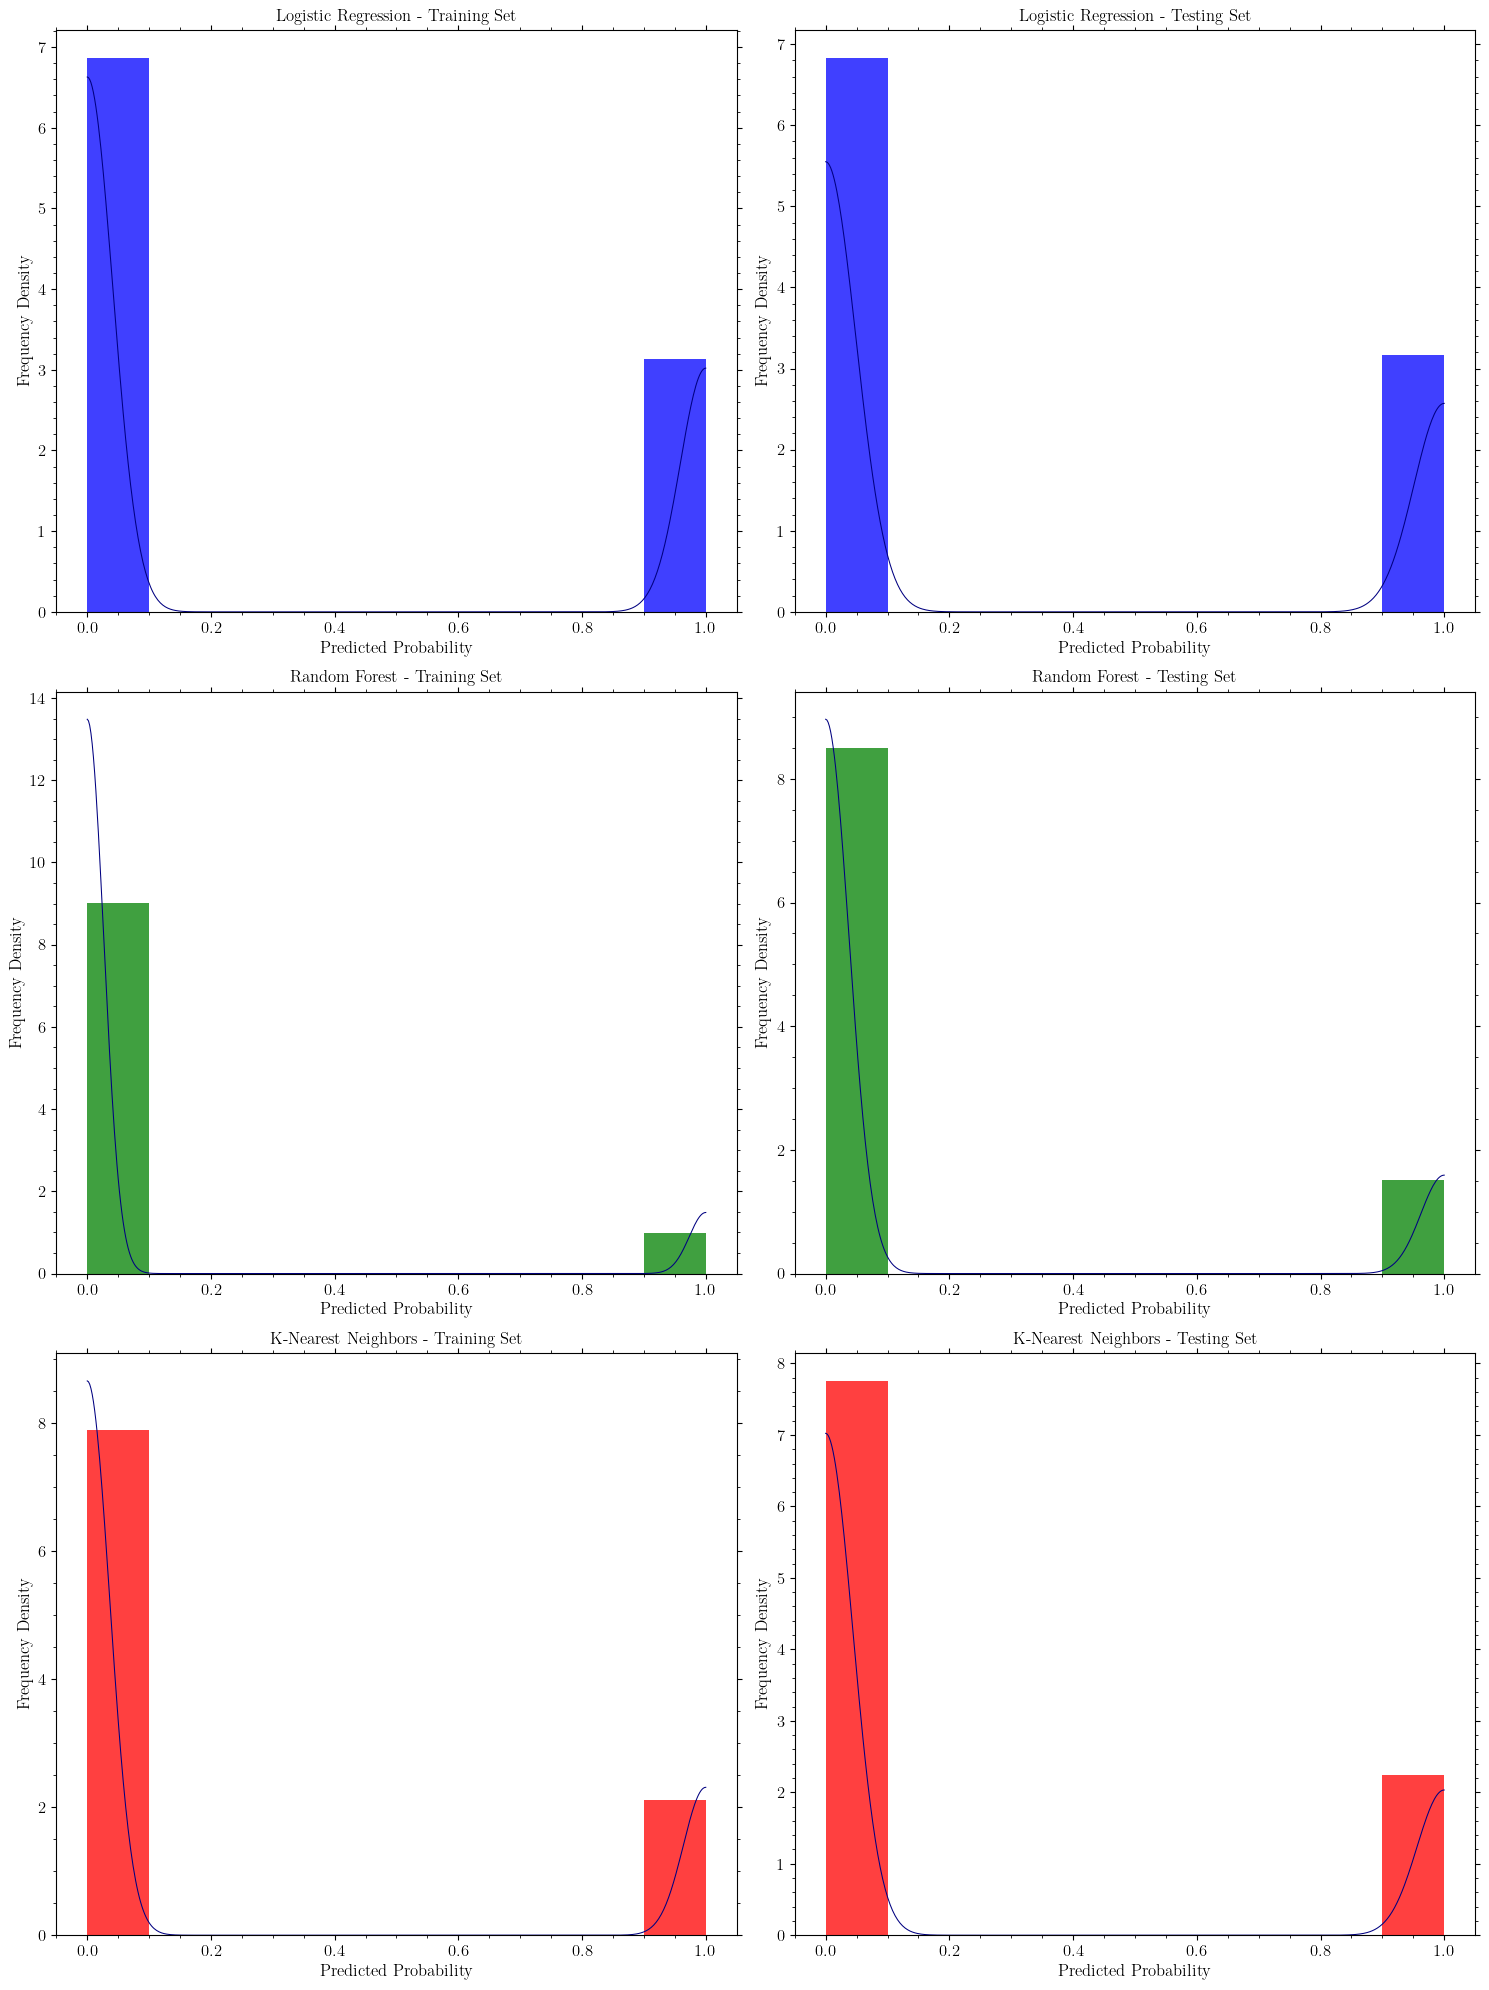

Classification Report for Logistic Regression on Training Data
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84    160963
         1.0       0.23      0.78      0.36     16613

    accuracy                           0.74    177576
   macro avg       0.60      0.76      0.60    177576
weighted avg       0.90      0.74      0.79    177576

[[118377  42586]
 [  3610  13003]]


Classification Report for Logistic Regression on Testing Data
              precision    recall  f1-score   support

         0.0       0.97      0.73      0.84     68824
         1.0       0.24      0.79      0.37      7280

    accuracy                           0.74     76104
   macro avg       0.60      0.76      0.60     76104
weighted avg       0.90      0.74      0.79     76104

[[50475 18349]
 [ 1538  5742]]


Classification Report for Random Forest on Training Data
              precision    recall  f1-score   support

         0.0       0.99      0.98      

In [121]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

# Train models and collect predictions
train_predictions = {}
test_predictions = {}

for model_name, model in models.items():
    model.fit(X_resampled, y_resampled)
    train_predictions[model_name] = model.predict(X_train)
    test_predictions[model_name] = model.predict(X_test)
total=3
dpi = 200 # 200-300 as per guidelines
# maxpix = 670  # max pixels of plot
maxpix = 3200  # max pixels of plot
width = maxpix / dpi  # max allowed with
# Configuration for plots
rcParams.update({'axes.labelsize': 'large', 'axes.titlesize': 'large',
                 'xtick.labelsize': 'large', 'ytick.labelsize': 'large',
                 'legend.fontsize': 'x-small', 'legend.frameon': False,
                 'legend.facecolor': 'none', 'legend.handletextpad': 0.25,
                 'font.serif': ['Computer Modern', 'Helvetica', 'Arial',
                                'Tahoma', 'Lucida Grande', 'DejaVu Sans'],
                 'font.family': 'serif', 'mathtext.fontset': 'cm', 'mathtext.default': 'regular',
                 'figure.figsize': [15, 10], 'figure.dpi': 100,
                 'text.color' : "black", 'axes.labelcolor' : "black", 'axes.facecolor': 'white',
                 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'none',
                 'lines.linewidth': .75, 'xtick.top': True, 'ytick.right': True,
                 'xtick.minor.visible': True, 'ytick.minor.visible': True,
                 'text.usetex': True})

# Plotting histograms and KDEs for each model's predictions
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
axs = axs.flatten()

bins = np.arange(0, 1.1, 0.1)
colors = ['blue', 'green', 'red', 'purple']
model_names = list(models.keys())

for i, model_name in enumerate(model_names):
    train_pred = train_predictions[model_name]
    test_pred = test_predictions[model_name]

    # KDE for train predictions
    kde_train = gaussian_kde(train_pred)
    kde_test = gaussian_kde(test_pred)

    xgrid = np.linspace(0, 1, 500)
    kde_train_pdf = kde_train.evaluate(xgrid)
    kde_test_pdf = kde_test.evaluate(xgrid)

    # Plot histograms and KDEs
    axs[i*2].hist(train_pred, bins, density=True, alpha=0.75, color=colors[i])
    axs[i*2].plot(xgrid, kde_train_pdf, color='navy')
    axs[i*2].set_title(f'{model_name} - Training Set')
    axs[i*2].set_xlabel('Predicted Probability')
    axs[i*2].set_ylabel('Frequency Density')

    axs[i*2 + 1].hist(test_pred, bins, density=True, alpha=0.75, color=colors[i])
    axs[i*2 + 1].plot(xgrid, kde_test_pdf, color='navy')
    axs[i*2 + 1].set_title(f'{model_name} - Testing Set')
    axs[i*2 + 1].set_xlabel('Predicted Probability')
    axs[i*2 + 1].set_ylabel('Frequency Density')

plt.tight_layout()
plt.show()

# Printing Classification Reports
for model_name in model_names:
    print(f"Classification Report for {model_name} on Training Data")
    print(classification_report(y_train, train_predictions[model_name]))
    print(confusion_matrix(y_train, train_predictions[model_name]))
    print("\n")

    print(f"Classification Report for {model_name} on Testing Data")
    print(classification_report(y_test, test_predictions[model_name]))
    print(confusion_matrix(y_test, test_predictions[model_name]))
    print("\n")